Daniel Rocha Ruiz, MSc in Data Science and Business Analytics

Scope:
- This notebook is a data viz exercise. We have a look at deaths in Italy per month.
- In an aggregate level, COVID mortality matches the *excess mortality* quite well.

Data:
- http://opendatadpc.maps.arcgis.com/apps/opsdashboard/index.html#/b0c68bce2cce478eaac82fe38d4138b1

# Set-up
## Import packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# general
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# custom
from functions import *

## Load data

In [3]:
# load data
with open('data/comuni_giornaliero.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
    
df = pd.DataFrame(data[1:],columns=data[0])
print(df.columns)

# it should have 914.622 lines (1 is column title)
# missing line = no one died in the county/date
# county = comune
print(df.shape[0])

# unique counties 7904 (4 no one died since 2015!, so 7900)
print(len(df.COD_PROVCOM.unique()))

Index(['REG', 'PROV', 'NOME_REGIONE', 'NOME_PROVINCIA', 'NOME_COMUNE',
       'COD_PROVCOM', 'TIPO_COMUNE', 'CL_ETA', 'GE', 'M_15', 'M_16', 'M_17',
       'M_18', 'M_19', 'M_20', 'F_15', 'F_16', 'F_17', 'F_18', 'F_19', 'F_20',
       'T_15', 'T_16', 'T_17', 'T_18', 'T_19', 'T_20'],
      dtype='object')
914621
7900


# Process data

In [4]:
# add columns
# GE = MMDD -> month and day
df['DD'] = df['GE'].apply(lambda x: x[2:])
df['MM'] = df['GE'].apply(lambda x: x[:2])

# April has less data -> Analysis of 1Q
df_reduc = df[df.MM!='04']

# convert to numeric
df_reduc = df_reduc.apply(pd.to_numeric,errors='coerce')

# eliminate comuni that have no 2020 data ('')
df_reduc = df_reduc[df_reduc.T_20.notnull()]

# 6857 (off 6866 by 9 comuni, but 4 are out Balmuccia, Rassa, Malvicino e Pedesina -> 5???) 
print(len(df_reduc.COD_PROVCOM.unique().tolist()))
print(df_reduc.T_20.unique())

6857
[ 0.  1.  2.  4.  3.  5.  7.  6.  8. 11.  9. 10. 18. 12. 19. 15. 13. 14.
 17. 16. 25. 23. 28. 24. 20. 26. 22. 31. 27. 21.]


# Plot

## Total Deaths by Month - All Pop

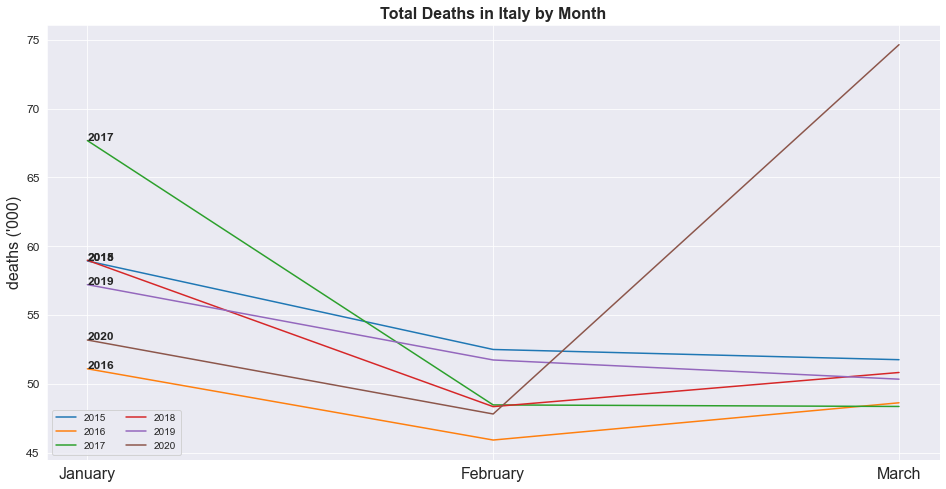

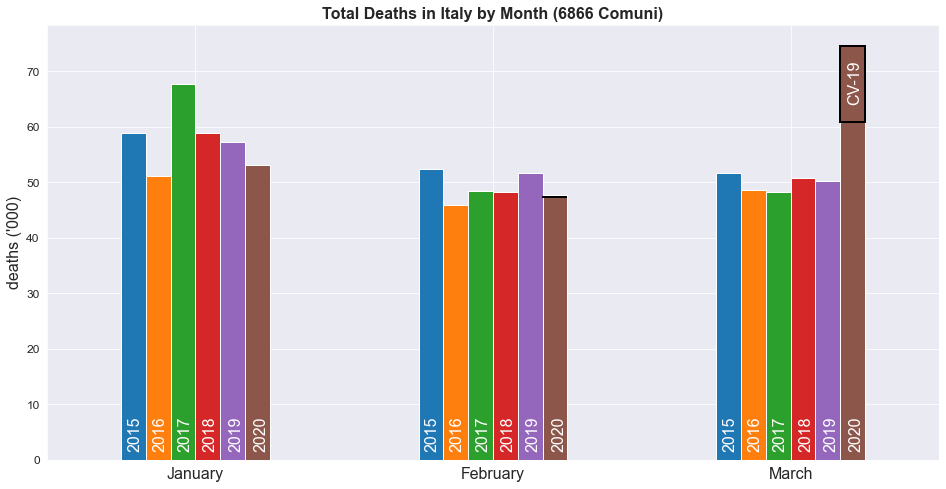

In [5]:
# all pop
sup = reduce_df(df_reduc)

plot_lines(sup)
plot_bars(sup)

## Total Deaths by Month - Male Pop

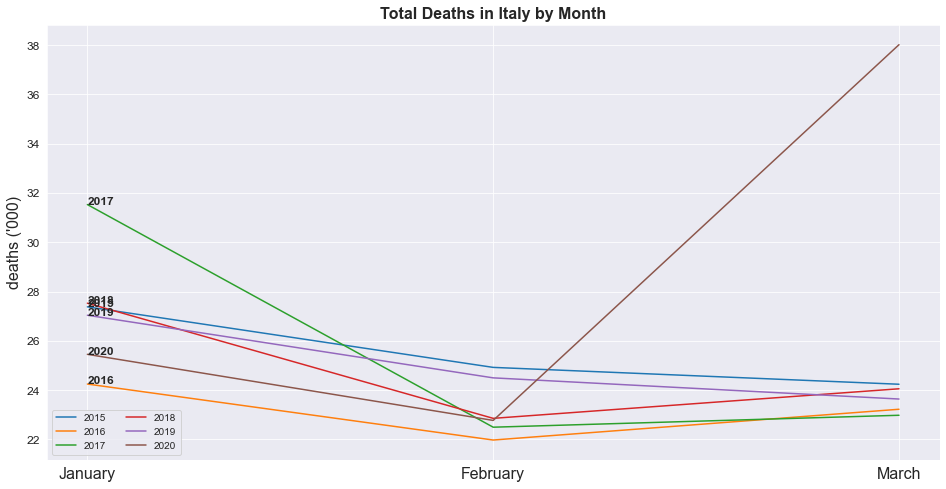

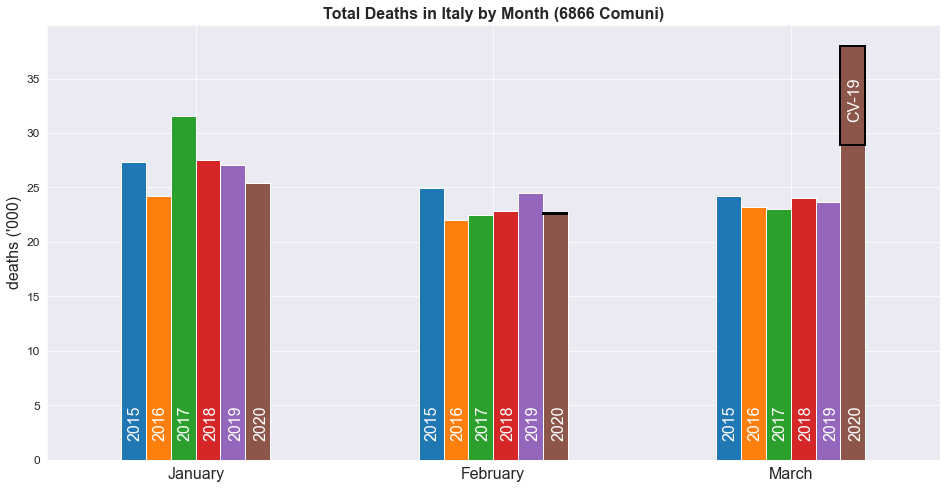

In [6]:
# male
sup_m = reduce_df(df_reduc,cols=['MM','M_15','M_16','M_17','M_18','M_19','M_20'])

plot_lines(sup_m)
plot_bars(sup_m,gr=2/3)

## Total Deaths by Month - Female Pop

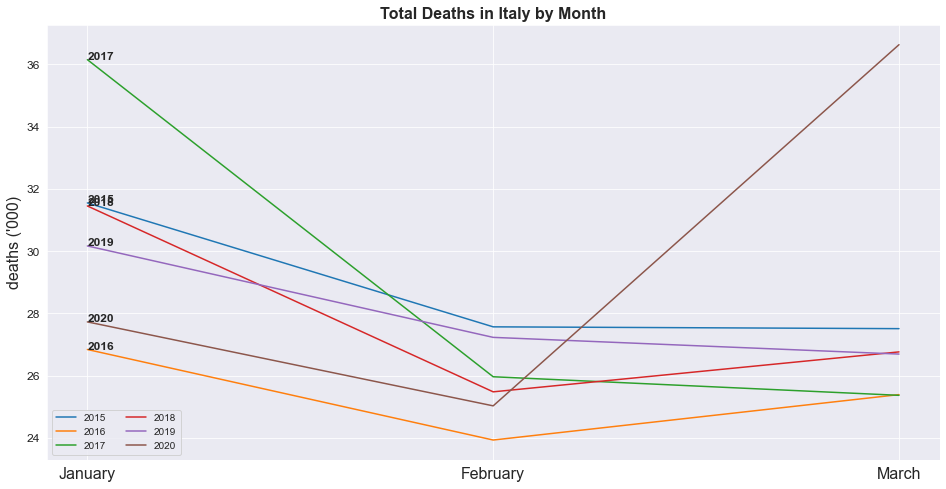

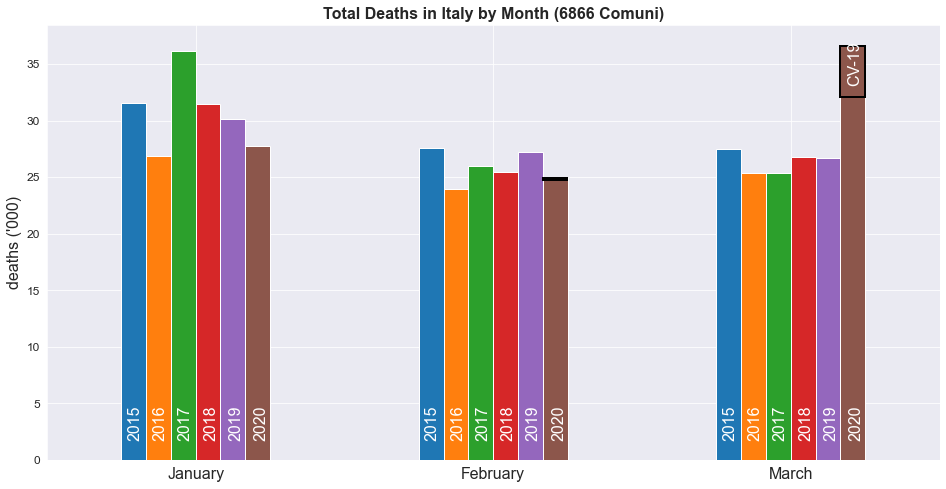

In [7]:
# female
sup_f = reduce_df(df_reduc,cols=['MM','F_15','F_16','F_17','F_18','F_19','F_20'])
plot_lines(sup_f)
plot_bars(sup_f,gr=0.33)